In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
from tqdm import tqdm_notebook as tqdm
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
import pandas as pd

딕셔너리 형태로 스크랩핑
span {태그,태그이름}
이런게 있다 알아두자

# href 속성

 href속성은 a 태그랑 같이 쓰인다

 ## href주소 추출
 
 href가 있는 태그/클래스를 선택하고
 
 for문으로 추출
 

In [2]:
driver=webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://news.sbs.co.kr/news/newsflash.do?pageDate=20220704&pageldx=1")

In [3]:
soup=bs(driver.page_source,"lxml")

In [4]:
news = soup.select("a.news")

In [5]:
news

[<a class="news" href="/news/endPage.do?news_id=N1006810515" title="고속도로 달리던 트럭서 불…다친 사람 없어">
 <!-- 텍스트 -->
 <p class="desc">
 <strong class="sub">고속도로 달리던 트럭서 불…"다친 사람 없어"</strong>
 <span class="read">고속도로를 달리던 화물차에서 원인을 알 수 없는 불이 나 20여 분 만에 꺼졌습니다. 오늘 저녁 8시 반쯤 경부고속도로 부산 방면 옥천나들목 근처에서 60대 남성이 몰던 14.5톤 화물차에 불이 났습니다.</span>
 <em class="name">SBS | 안희재 기자</em>
 <span class="date">2022.07.04 22:45</span>
 </p>
 </a>,
 <a class="news" href="/news/endPage.do?news_id=N1006810514" title="우크라이나, 흑해 최대 요충지 재탈환… 뱀섬에 국기 게양">
 <!-- 텍스트 -->
 <p class="desc">
 <strong class="sub">우크라이나, 흑해 최대 요충지 재탈환… "뱀섬에 국기 게양"</strong>
 <span class="read">우크라이나는 앞서 러시아에 점령당했던 '뱀섬'이라고 불리는 흑해의 요충지 즈미니섬을 다시 탈환했다고 밝혔습니다. 로이터 통신에 따르면 나탈리아 후메니우크 우크라이나 남부 사령부 대변인은 기자회견을 통해 "군사 작전이 종료됐고 뱀섬은 우크라이나 관할권으로 돌아왔다"며, 지난 주 러시아군이 퇴각한 뒤 뱀섬에 우크라이나 국기가 게양됐다고 밝혔습니다.</span>
 <em class="name">SBS | 김형래 기자</em>
 <span class="date">2022.07.04 22:43</span>
 </p>
 </a>,
 <a class="news" href="/news/endPage.do?news_id=N1006810513" title="푸틴,

In [6]:
for i in news:
    print("https://news.sbs.co.kr"+i["href"])
    #i.href만 가져오면 https://news.sbs.co.kr가 빠진채로 나오기 떄문에 https://news.sbs.co.kr을 붙여줌

https://news.sbs.co.kr/news/endPage.do?news_id=N1006810515
https://news.sbs.co.kr/news/endPage.do?news_id=N1006810514
https://news.sbs.co.kr/news/endPage.do?news_id=N1006810513
https://news.sbs.co.kr/news/endPage.do?news_id=N1006810512
https://news.sbs.co.kr/news/endPage.do?news_id=N1006810482
https://news.sbs.co.kr/news/endPage.do?news_id=N1006810498
https://news.sbs.co.kr/news/endPage.do?news_id=N1006810444
https://news.sbs.co.kr/news/endPage.do?news_id=N1006810443
https://news.sbs.co.kr/news/endPage.do?news_id=N1006810442
https://news.sbs.co.kr/news/endPage.do?news_id=N1006810441


# 텍스트 분석하기

텍스트 마이닝은 비정형 데이터로부터 인사이트 추출을 위해 수집된 데이터를 정제하고 범주화

In [7]:
from konlpy.tag import Okt
okt = Okt()
from konlpy.tag import Hannanum
hannanum = Hannanum()
from konlpy.tag import Komoran
komoran = Komoran()
from konlpy.tag import Kkma
kkma = Kkma()

## 형태소 분석

하나의 문장을 분석하기 좋게 정제하는 방식

필요하다고 생각되어지는 태그만 추출해서 사용

대표적인 분석기로는 영어로는 NLTK 라이브러리

한국어로는 Konlpy 라이브러리가 있다.

*Mecab=mac에서만 작동함 속도가 제일 빠름 Konlpy 라이브러리는 아님

### 모든 라이브러리가 동일하게 제공되는 함수

~.morphs(text): 형태소 단위로 분리

~.nouns(text): 명사만 추출

~.pos(text): 품사 태깅(단순한 형태소로 분리하는게 아니라 품사끼리 매칭해서 태깅)

### okt만 제공하는 함수

문장 정규화: okt.morphs(text,norm=True)

어간 추출: okt.morphs(text,stem=True)

두가지 동시 사용 okt.morphs(text,norm=True, stem=True)

In [8]:
from konlpy.tag import Okt
okt=Okt()

In [9]:
okt.morphs("나는 밥을 먹었다.")

['나', '는', '밥', '을', '먹었다', '.']

단순 형태소 분석

In [10]:
text = '나는 오늘 친구와 함께 영화를 볼 계획이다.'

In [11]:
okt.morphs(text)

['나', '는', '오늘', '친구', '와', '함께', '영화', '를', '볼', '계획', '이다', '.']

In [12]:
okt.pos(text)

[('나', 'Noun'),
 ('는', 'Josa'),
 ('오늘', 'Noun'),
 ('친구', 'Noun'),
 ('와', 'Josa'),
 ('함께', 'Adverb'),
 ('영화', 'Noun'),
 ('를', 'Josa'),
 ('볼', 'Noun'),
 ('계획', 'Noun'),
 ('이다', 'Josa'),
 ('.', 'Punctuation')]

In [13]:
okt.nouns(text)
#noun에 대해서는 전처리를 안해도 추출이 가능

['나', '오늘', '친구', '영화', '볼', '계획']

In [14]:
text = '나 오늘 끝나고 저녁 맛있는거 먹을거얔ㅋㅋㅋㅋ'

In [15]:
okt.morphs(text,norm=True)
#정규화

['나', '오늘', '끝나고', '저녁', '맛있는거', '먹을거야', 'ㅋㅋㅋ']

In [16]:
okt.morphs(text,stem=True)
#어간화

['나', '오늘', '끝나다', '저녁', '맛있다', '먹다', '얔', 'ㅋㅋㅋㅋ']

In [17]:
okt.morphs(text,norm=True,stem=True)
#혼용 가능

['나', '오늘', '끝나다', '저녁', '맛있다', '먹다', 'ㅋㅋㅋ']

In [18]:
hannanum.morphs(text)

['나', '오늘', '끝나', '고', '저녁', '맛있는거', '먹을거얔ㅋㅋㅋㅋ']

In [19]:
komoran.morphs(text)

['나', '오늘', '끝나', '고', '저녁', '맛있', '는', '거', '먹을거얔ㅋㅋㅋㅋ']

In [20]:
okt.morphs(text)

['나', '오늘', '끝나고', '저녁', '맛있는거', '먹을거', '얔', 'ㅋㅋㅋㅋ']

In [21]:
kkma.morphs(text)

['나', '오늘', '끝나', '고', '저녁', '맛있', '는', '거', '먹', '을', '거', '얔', 'ㅋㅋㅋㅋ']

In [22]:
hannanum.pos(text)

[('나', 'N'),
 ('오늘', 'N'),
 ('끝나', 'P'),
 ('고', 'E'),
 ('저녁', 'N'),
 ('맛있는거', 'N'),
 ('먹을거얔ㅋㅋㅋㅋ', 'N')]

In [23]:
komoran.pos(text)

[('나', 'NP'),
 ('오늘', 'NNG'),
 ('끝나', 'VV'),
 ('고', 'EC'),
 ('저녁', 'NNG'),
 ('맛있', 'VA'),
 ('는', 'ETM'),
 ('거', 'NNB'),
 ('먹을거얔ㅋㅋㅋㅋ', 'NA')]

In [24]:
kkma.pos(text)

[('나', 'NP'),
 ('오늘', 'MAG'),
 ('끝나', 'VV'),
 ('고', 'ECE'),
 ('저녁', 'NNG'),
 ('맛있', 'VA'),
 ('는', 'ETD'),
 ('거', 'NNB'),
 ('먹', 'VV'),
 ('을', 'ETD'),
 ('거', 'NNB'),
 ('얔', 'UN'),
 ('ㅋㅋㅋㅋ', 'EMO')]

### 불용어 제거하기

불용어 = 큰 의미를 가지고 있지 않은 단어.
불용어를 리스트에 직접 입력을 해 준 다음 원하는 품사를 가지고 오는 방식

pos태깅 이용

In [25]:
okt.pos(text)[0][1]
#인덱싱 가능

'Noun'

In [26]:
pos_word = okt.pos(text,stem=True,norm=True)
pos_word 

[('나', 'Noun'),
 ('오늘', 'Noun'),
 ('끝나다', 'Verb'),
 ('저녁', 'Noun'),
 ('맛있다', 'Adjective'),
 ('먹다', 'Verb'),
 ('ㅋㅋㅋ', 'KoreanParticle')]

In [27]:
word_list=[]
for word,tag in pos_word: 
    #for문에 두가지 변수를 사용함. 첫 루프에서 word는 인덱스 0번, tag는 인덱스 1번이 추출됨
    #pos_word에 2개의 변수가 있어서 사용이 가능함.
    if tag in ['Verb']:
        word_list.append(word) 
#원하는 문장에서 동사를 뽑아내는 코드

In [28]:
word_list

['끝나다', '먹다']

In [29]:
word_list=[]
for word,tag in pos_word: 
    #for문에 두가지 변수를 사용함. 첫 루프에서 word는 인덱스 0번, tag는 인덱스 1번이 추출됨
    #pos_word에 2개의 변수가 있어서 사용이 가능함.
    if tag in ['Verb','Noun']:
        word_list.append(word) 
#원하는 문장에서 명사와,동사를 뽑아내는 코드

In [30]:
word_list

['나', '오늘', '끝나다', '저녁', '먹다']

In [31]:
pos_word=okt.pos(text,stem=True,norm=True)

stopwords=['나','이다']

word_list=[]
for word,tag in pos_word:
    if tag in ["Verb","Noun"]:
        if word not in stopwords:
            word_list.append(word)

In [32]:
word_list

['오늘', '끝나다', '저녁', '먹다']

In [33]:
def extract_pos(text):
    
    pos_word=okt.pos(text,stem=True,norm=True)

    stopwords=['나','이다'] #원하는 불용어를 넣어줌

    word_list=[]
    for word,tag in pos_word:
        if tag in ["Verb","Noun"]: #출력하기를 원하는 태그(품사)를 넣어줌
            if word not in stopwords:
                word_list.append(word)
    return word_list

In [34]:
string = '나 오늘 끝나고 저녁 맛있는거 먹을거야'

In [35]:
extract_pos(string)

['오늘', '끝나다', '저녁', '먹다']

# 영어 형태소 분석

nltk.download()
#설치 코드

!pip install nltk
#설치코드

In [36]:
import nltk
from nltk import pos_tag

In [37]:
text = 'The little yellow dog barked at the Persian cat'

In [38]:
nltk.word_tokenize(text)
#형태소 분석

['The', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'Persian', 'cat']

In [39]:
#형태소 단위로 분리
split_text = nltk.word_tokenize(text)
tagged_text = nltk.pos_tag(split_text)
tagged_text

[('The', 'DT'),
 ('little', 'JJ'),
 ('yellow', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('Persian', 'JJ'),
 ('cat', 'NN')]

In [40]:
nltk.download("punkt")
#불용어 다운로드용 코드

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
nltk.download("stopwords")
#불용어 다운로드용 코드

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
stopwords= nltk.corpus.stopwords.words("english")
stopwords
#불용어 목록
#nltk로 불용어 제거를 할때는 소문자로 변환 후 제거를 해줘야함.

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
text.lower()
#.lower(): 대문자를 소문자 변환

'the little yellow dog barked at the persian cat'

In [51]:
def extract_pos_english(text):
    
    stopwords= nltk.corpus.stopwords.words("english")
    #불용어 정의 (주석화 가능)
    
    text = text.lower()
    #불용어 제거를 위한 텍스트 소문자 변환
    split_word=nltk.word_tokenize(text)
    #영어 문장 형태소로 나누기
    pos_word=nltk.pos_tag(split_word)
    #영어 문장 품사 태깅
    
    word_list = []
    
    #불용어 제거
    for word,tag in pos_word:
        if tag in ["NN","NNS","NNP","NNPS"]:
            #명사만 추출
            #형용사= 'JJ','JJR','JJS'
            #동사 = 'VB','VBD','VBG','VBN','VBP','VBZ'
            if word not in stopwords:
                word_list.append(word)
    
    return word_list

#영어 명사만 추출해내는 함수.(불용어 제거)

In [52]:
extract_pos_english(text)

['dog', 'cat']

In [53]:
string = 'The little yellow dog barked at the Persian cat'

In [56]:
data = extract_pos_english(string)

### 저장 (pickle 라이브러리)

데이터프레임, 리스트등 가능

In [55]:
import pickle

In [62]:
with open('save_data.pkl','wb') as f:
    pickle.dump(data,f)
#save_data.pkl이라는 피클 파일을 생성 후 리스트 저장 , 

### 읽어오기

In [61]:
with open('save_data.pkl','rb') as f:
    data2 = pickle.load(f)
#세이브한 피클 파일 읽어오기

In [60]:
data2

['dog', 'cat']

# 워드 클라우드

빈도 분석을 시각화 해줄 수 있는 텍스트 분석 방식

가장 기본이 되는 텍스트 분석 방식

특정 단어가 자주 출현하면 핵심 단어라고 볼 수 있다.

In [63]:
#워드클라우드 설치
!pip install wordcloud
#설치가 안되는 경우
# conda install -c https://conda.anaconda.org/conda-forge wordcloud

In [65]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
#워드 클라우드를 사용하기 위한 3가지 import구문(필수)

In [66]:
text ='토트넘 훗스퍼에서는 아무도 선정되지 못했다. 영국 공영방송 \'BBC\'가 이주의 팀을 공개했다. 영국 \'BBC\'에서 축구 전문가로 활동하는 가레스 크룩은 매주 잉글리시 프리미어리그(EPL) 경기가 끝나면 이주의 팀을 선정해 발표한다. 해당 라운드에서 최고의 활약을 펼친 11명의 선수들이 명단에 이름을 올린다. EPL 2라운드, 최고의 활약을 보여준 선수들은 누구일까.포메이션은 3-4-3. 최전방에는 루이스 디아스, 로드리고 모레노, 가브리엘 제수스가 섰다. 디아스는 크리스탈 팰리스와의 경기에서 리버풀이 다르윈 누녜스의 퇴장에도 불구하고 무승부를 거둘 수 있었던 이유였다. 홀로 수비를 제친 뒤 깔끔한 슈팅으로 팀의 동점골을 득점했다.제수스와 모레노는 2라운드에서 멀티골을 뽑아냈다. 특히 제수스는 골 외에도 2개의 도움을 기록하며 아스널의 4골에 모두 기여했다. 모레노는 사우샘프턴 원정에서 2골을 넣으며 리즈 유나이티드에 리드를 안겼지만, 후반전에 2실점을 허용해 무승부를 거둬 아쉬움을 삼켰다.중원에는 그라니트 자카와 케빈 더 브라위너가, 측면에는 리스 제임스와 마티아스 옌센이 선정됐다. 모두 2라운드에서 득점을 기록했던 선수들이다. 이 중 옌센은 브렌트포드가 맨체스터 유나이티드를 무려 4-0으로 격파한 경기의 주역이었다. 크룩은 옌센에 대해 "옌센의 첫 번째 골은 훌륭했고, 전반적인 기여도는 상당히 높았다"라는 코멘트를 남겼다.제임스는 토트넘과의 런던 더비에서 맹활약을 펼쳤다. 쓰리백의 오른쪽 스토퍼로 출전해 손흥민과 라이언 세세뇽을 꼼짝 못하게 했고, 팀의 역전골을 기록하는 등 공수 양면에서 좋은 경기력을 보여줬다.칼리두 쿨리발리, 폰투스 얀손, 그리고 타이론 밍스가 수비진을 구축했다. 쿨리발리는 토트넘전에서 멋진 발리 슈팅으로 경기의 선제골이자 첼시 데뷔골을 만들어냈다. 이 외에도 적응기가 필요 없는 듯한 모습으로 첼시 수비에도 안정감을 더했던 쿨리발리다. 얀손은 맨유전에서 맨유 공격진을 꽁꽁 묶었고, 밍스도 마찬가지로 에버턴전에서 좋은 수비력을 보여주며 팀의 2-1 승리를 도왔다.골키퍼는 닉 포프다. 뉴캐슬 유나이티드는 브라이튼과 0-0으로 비겼는데, 이날 포프는 무려 6개의 선방을 기록하며 팀의 골문을 책임졌다. 포프의 선방이 아니었다면 패배했을 수도 있었던 경기였다.'

In [68]:
result = okt.nouns(text)
result

['토트넘',
 '훗스퍼',
 '아무',
 '선정',
 '영국',
 '공영',
 '방송',
 '이주',
 '팀',
 '공개',
 '영국',
 '축구',
 '전문가',
 '활동',
 '가레스',
 '크룩',
 '잉글리시',
 '프리미어리그',
 '경기',
 '이주',
 '팀',
 '선정',
 '발표',
 '해당',
 '라운드',
 '최고',
 '활약',
 '명의',
 '선수',
 '명단',
 '이름',
 '올린다',
 '라운드',
 '최고',
 '활약',
 '선수',
 '누구',
 '포',
 '메이',
 '션',
 '최',
 '전방',
 '루이스',
 '디아스',
 '로드',
 '리',
 '모레',
 '노',
 '가브리엘',
 '수스',
 '디아스',
 '크리스탈',
 '팰리스',
 '경기',
 '리버풀',
 '다르윈',
 '누녜스',
 '퇴장',
 '불구',
 '무승부',
 '수',
 '이유',
 '홀로',
 '수비',
 '친',
 '뒤',
 '슈팅',
 '팀',
 '동점골',
 '득점',
 '수스',
 '모레',
 '노',
 '라운드',
 '멀티골',
 '수스',
 '골',
 '외',
 '개',
 '도움',
 '기록',
 '아스널',
 '골',
 '모두',
 '기여',
 '모레',
 '노',
 '사우샘프턴',
 '원정',
 '골',
 '리즈',
 '유나이티드',
 '리드',
 '후반전',
 '실점',
 '허용',
 '무승부',
 '아쉬움',
 '중원',
 '그',
 '니트',
 '자카',
 '케빈',
 '더',
 '브라',
 '위너',
 '측면',
 '리스',
 '제임스',
 '마티아스',
 '옌센',
 '선정',
 '모두',
 '라운드',
 '득점',
 '기록',
 '선수',
 '이',
 '중',
 '옌센',
 '브렌트포드',
 '맨체스터',
 '유나이티드',
 '무려',
 '격파',
 '경기',
 '주역',
 '크룩',
 '옌센',
 '대해',
 '옌센',
 '첫',
 '전반',
 '기여',
 '도',
 '코멘트',
 '제임스',
 '토트넘',
 '런던'

In [75]:
count = Counter(result)
count
#이런 경우에는 재코딩이 필요
#형태소 분석기의 한계가 있음.(어떠한 품사인지 알지 못하면 없애버림)

Counter({'토트넘': 3,
         '훗스퍼': 1,
         '아무': 1,
         '선정': 3,
         '영국': 2,
         '공영': 1,
         '방송': 1,
         '이주': 2,
         '팀': 6,
         '공개': 1,
         '축구': 1,
         '전문가': 1,
         '활동': 1,
         '가레스': 1,
         '크룩': 2,
         '잉글리시': 1,
         '프리미어리그': 1,
         '경기': 6,
         '발표': 1,
         '해당': 1,
         '라운드': 4,
         '최고': 2,
         '활약': 2,
         '명의': 1,
         '선수': 3,
         '명단': 1,
         '이름': 1,
         '올린다': 1,
         '누구': 1,
         '포': 1,
         '메이': 1,
         '션': 1,
         '최': 1,
         '전방': 1,
         '루이스': 1,
         '디아스': 2,
         '로드': 1,
         '리': 1,
         '모레': 3,
         '노': 3,
         '가브리엘': 1,
         '수스': 3,
         '크리스탈': 1,
         '팰리스': 1,
         '리버풀': 1,
         '다르윈': 1,
         '누녜스': 1,
         '퇴장': 1,
         '불구': 1,
         '무승부': 2,
         '수': 1,
         '이유': 1,
         '홀로': 1,
         '수비': 4,
         '친'

In [71]:
count.most_common(10)
#가장 많은 n개를 출력

[('팀', 6),
 ('경기', 6),
 ('라운드', 4),
 ('수비', 4),
 ('골', 4),
 ('기록', 4),
 ('옌센', 4),
 ('토트넘', 3),
 ('선정', 3),
 ('선수', 3)]

In [76]:
#워드 클라우드 선
wordcloud = WordCloud(font_path='C:\\Windows\\Fonts\\gulim.ttc', 
                      #폰트 설정 필수. 한국어 분석에는 한국어를 볼수있는 폰트를 가져오자
                     width=700,
                     height=700,
                     background_color='white', #배경 색
                     colormap = 'spring', #글자 색 변경하기
                     random_state=1).generate_from_frequencies(count)

### 폰트 파일 찾는법


내 PC->c드라이브->Windows 폴더 -> Fonts 폴더 -> 원하는 폰트선택

선택한 파일에 오른쪽마우스를 눌러 속성을 눌러 폰트 이름과 폰트 형식을 확인한 후 

복사해서 font path를 가져온다.

<function matplotlib.pyplot.show(close=None, block=None)>

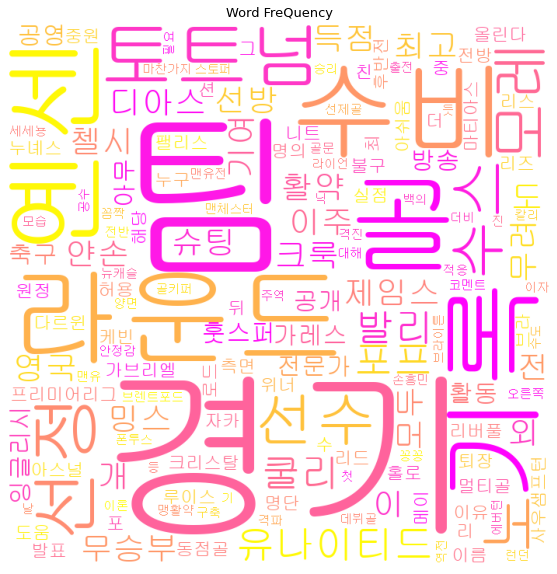

In [78]:
#워드 클라우드 시각화하기
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off") #축 지정 X
plt.title("Word FreQuency",size = 13)
plt.show

In [79]:
from PIL import Image #이미지를 불러올 수 있는 라이브러리
import numpy as np #이미지를 이미지로 넣을 수 없기 때문에 행렬로 사용하기 위해 numpy 임포트

In [80]:
#마스크 이미지 만들기
mask_image = np.array(Image.open(r"C:\Users\user\Downloads\football.jpg"))
mask_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [81]:
#워드 클라우드 선언하기
wordcloud = WordCloud(mask = mask_image,
                      font_path='C:\\Windows\\Fonts\\gulim.ttc', 
                      #폰트 설정 필수. 한국어 분석에는 한국어를 볼수있는 폰트를 가져오자
                      width=700,
                      height=700,
                      background_color='white', #배경 색
                      colormap = 'spring', #글자 색 변경하기
                      random_state=1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

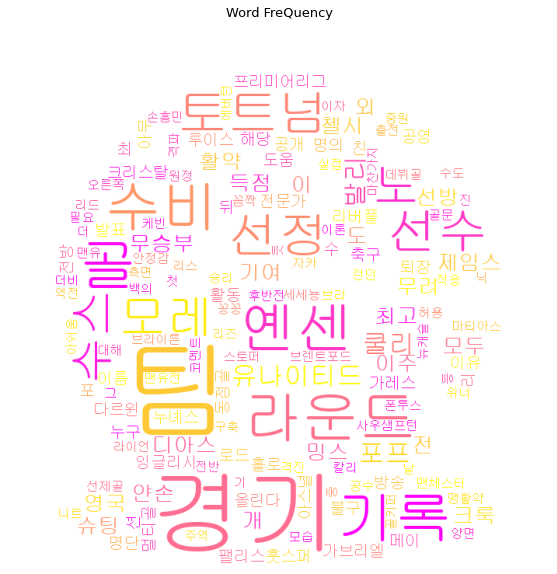

In [82]:
#워드 클라우드 시각화하기
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off") #축 지정 X
plt.title("Word FreQuency",size = 13)
plt.show

# 실습 - 뉴스 본문 크롤링후 워드 클라우드 만들기

In [83]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://news.sbs.co.kr/news/newsflash.do?pageDate=20220704&pageldx=1")

In [85]:
soup = bs(driver.page_source,'lxml')

In [123]:
news = soup.select("a.news")
href_list = []
for i in news:
    href_list.append("https://news.sbs.co.kr"+i["href"])
href_list
#href리스트 추출

['https://news.sbs.co.kr/news/endPage.do?news_id=N1006810515',
 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006810514',
 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006810513',
 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006810512',
 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006810482',
 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006810498',
 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006810444',
 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006810443',
 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006810442',
 'https://news.sbs.co.kr/news/endPage.do?news_id=N1006810441']

In [125]:
newstext=[]
for i in href_list:
    driver.get(i)
    #드라이버에 페이지를 가져옴
    time.sleep(1)
    #로딩 시간
    soup = bs(driver.page_source,"lxml")
    #객체화
    article = soup.select("div.text_area")
    #article에 할당
    article = article[0].text.replace('\n',"")
    newstext.append(article)
newstext

['  고속도로를 달리던 화물차에서 원인을 알 수 없는 불이 나 20여 분 만에 꺼졌습니다.   오늘(4일) 저녁 8시 반쯤 경부고속도로 부산 방면 옥천나들목 근처에서 60대 남성이 몰던 14.5톤 화물차에 불이 났습니다.   이 불로 다친 사람은 없는 것으로 전해졌습니다.   소방 당국은 적재함 근처에서 불이 시작됐을 가능성에 무게를 두고 정확한 화재 경위를 조사하고 있습니다. ',
 '  우크라이나는 앞서 러시아에 점령당했던 \'뱀섬\'이라고 불리는 흑해의 요충지 즈미니섬을 다시 탈환했다고 밝혔습니다.   로이터 통신에 따르면 나탈리아 후메니우크 우크라이나 남부 사령부 대변인은 기자회견을 통해 "군사 작전이 종료됐고 뱀섬은 우크라이나 관할권으로 돌아왔다"며, 지난 주 러시아군이 퇴각한 뒤 뱀섬에 우크라이나 국기가 게양됐다고 밝혔습니다.   러시아군은 지난달 30일 뱀섬에서 병력을 전면 철수했는데, 러시아 국방부는 우크라이나의 곡물 수출을 위해 인도주의적 통로를 마련하기 위한 "호의의 표시"라고 주장했습니다.   하지만 우크라이나 측은 서방의 지원을 통해 자국이 뱀섬에 미사일과 드론, 곡사포 등의 화력을 집중하자 이를 견디지 못한 러시아군이 철수한 것이라며 "러시아가 호의를 표하도록 하기 위해서는 정기적으로 때려줄 필요가 있다"고 비꼬았습니다. ',
 '  블라디미르 푸틴 러시아 대통령은 러시아군이 우크라이나 동부 루한스크 지역을 완전히 장악한 직후 공세를 계속 이어나가라고 주문했습니다.   AFP통신은 푸틴 대통령이 세르게이 쇼이구 국방장관에게 "동부·서부군관구 등 군부대는 사전에 승인된 계획에 따라 임무를 수행해야 한다"며, "지금까지 루한스크에서 했던 것처럼 계속해서 나아가길 바란다"고 지시했다고 보도했습니다.   쇼이구 장관은 전날 푸틴 대통령에게 성공적인 군사작전을 통해 루한스크주의 핵심 요충지인 리시찬스크에 대한 \'완전한 통제권\'을 확보했다고 보고했습니다.   같은 날 우크라이나 군도 "리시찬스크에서 퇴각을 결정했다"며 러시아 측의 발표를 확인

In [132]:
total_string = ' '.join(newstext)
total_string
#띄어쓰기를 기준으로 모든 newstext의 인덱싱들이 합쳐지게 된다.

'  고속도로를 달리던 화물차에서 원인을 알 수 없는 불이 나 20여 분 만에 꺼졌습니다.   오늘(4일) 저녁 8시 반쯤 경부고속도로 부산 방면 옥천나들목 근처에서 60대 남성이 몰던 14.5톤 화물차에 불이 났습니다.   이 불로 다친 사람은 없는 것으로 전해졌습니다.   소방 당국은 적재함 근처에서 불이 시작됐을 가능성에 무게를 두고 정확한 화재 경위를 조사하고 있습니다.    우크라이나는 앞서 러시아에 점령당했던 \'뱀섬\'이라고 불리는 흑해의 요충지 즈미니섬을 다시 탈환했다고 밝혔습니다.   로이터 통신에 따르면 나탈리아 후메니우크 우크라이나 남부 사령부 대변인은 기자회견을 통해 "군사 작전이 종료됐고 뱀섬은 우크라이나 관할권으로 돌아왔다"며, 지난 주 러시아군이 퇴각한 뒤 뱀섬에 우크라이나 국기가 게양됐다고 밝혔습니다.   러시아군은 지난달 30일 뱀섬에서 병력을 전면 철수했는데, 러시아 국방부는 우크라이나의 곡물 수출을 위해 인도주의적 통로를 마련하기 위한 "호의의 표시"라고 주장했습니다.   하지만 우크라이나 측은 서방의 지원을 통해 자국이 뱀섬에 미사일과 드론, 곡사포 등의 화력을 집중하자 이를 견디지 못한 러시아군이 철수한 것이라며 "러시아가 호의를 표하도록 하기 위해서는 정기적으로 때려줄 필요가 있다"고 비꼬았습니다.    블라디미르 푸틴 러시아 대통령은 러시아군이 우크라이나 동부 루한스크 지역을 완전히 장악한 직후 공세를 계속 이어나가라고 주문했습니다.   AFP통신은 푸틴 대통령이 세르게이 쇼이구 국방장관에게 "동부·서부군관구 등 군부대는 사전에 승인된 계획에 따라 임무를 수행해야 한다"며, "지금까지 루한스크에서 했던 것처럼 계속해서 나아가길 바란다"고 지시했다고 보도했습니다.   쇼이구 장관은 전날 푸틴 대통령에게 성공적인 군사작전을 통해 루한스크주의 핵심 요충지인 리시찬스크에 대한 \'완전한 통제권\'을 확보했다고 보고했습니다.   같은 날 우크라이나 군도 "리시찬스크에서 퇴각을 결정했다"며 러시아 측의 발표를 확인했습니다.   리

In [133]:
result = okt.nouns(total_string)
result

['고속도로',
 '화물차',
 '원인',
 '알',
 '수',
 '불',
 '나',
 '여',
 '분',
 '오늘',
 '저녁',
 '쯤',
 '경부',
 '고속도로',
 '부산',
 '방면',
 '옥천',
 '나들목',
 '근처',
 '남성',
 '몰던',
 '톤',
 '화물차',
 '불',
 '이',
 '불로',
 '사람',
 '것',
 '소방',
 '당국',
 '적재',
 '함',
 '근처',
 '불',
 '시작',
 '가능성',
 '무게',
 '화재',
 '경위',
 '조사',
 '우크라이나',
 '앞서',
 '러시아',
 '점령',
 '뱀섬',
 '흑해',
 '요충지',
 '미니',
 '섬',
 '다시',
 '탈환',
 '로이터',
 '통신',
 '나탈리',
 '후',
 '우크라이나',
 '남부',
 '사령부',
 '대변인',
 '기자회견',
 '통해',
 '군사',
 '작전',
 '종료',
 '뱀섬',
 '우크라이나',
 '관할권',
 '며',
 '지난',
 '주',
 '러시아군',
 '퇴각',
 '뒤',
 '뱀섬',
 '우크라이나',
 '국기',
 '게양',
 '러시아군',
 '지난달',
 '뱀섬',
 '병력',
 '전면',
 '철수',
 '러시아',
 '국방부',
 '우크라이나',
 '곡물',
 '수출',
 '위해',
 '인도주의',
 '통로',
 '마련',
 '위',
 '호의',
 '표시',
 '주장',
 '우크라이나',
 '측은',
 '서방',
 '지원',
 '통해',
 '자국',
 '뱀섬',
 '미사일',
 '드론',
 '곡사포',
 '등',
 '화',
 '집중',
 '못',
 '러시아군',
 '철수',
 '것',
 '라며',
 '러시아',
 '호의',
 '표',
 '위',
 '정기',
 '필요',
 '고',
 '블라디미르',
 '푸틴',
 '러시아',
 '대통령',
 '러시아군',
 '우크라이나',
 '동부',
 '루한스크',
 '지역',
 '장악',
 '직후',
 '공세',
 '계속',
 '가라',
 '주문',
 '통신',
 '푸틴',

In [134]:
count = Counter(result)
count

Counter({'고속도로': 2,
         '화물차': 2,
         '원인': 1,
         '알': 1,
         '수': 7,
         '불': 3,
         '나': 1,
         '여': 2,
         '분': 1,
         '오늘': 6,
         '저녁': 1,
         '쯤': 1,
         '경부': 1,
         '부산': 1,
         '방면': 1,
         '옥천': 1,
         '나들목': 1,
         '근처': 2,
         '남성': 1,
         '몰던': 1,
         '톤': 1,
         '이': 6,
         '불로': 1,
         '사람': 1,
         '것': 6,
         '소방': 1,
         '당국': 2,
         '적재': 1,
         '함': 1,
         '시작': 2,
         '가능성': 3,
         '무게': 1,
         '화재': 1,
         '경위': 1,
         '조사': 1,
         '우크라이나': 12,
         '앞서': 3,
         '러시아': 11,
         '점령': 1,
         '뱀섬': 5,
         '흑해': 1,
         '요충지': 2,
         '미니': 1,
         '섬': 1,
         '다시': 1,
         '탈환': 1,
         '로이터': 3,
         '통신': 3,
         '나탈리': 1,
         '후': 4,
         '남부': 1,
         '사령부': 1,
         '대변인': 1,
         '기자회견': 1,
         '통해': 3,
     

In [138]:
count.most_common(100)

[('우크라이나', 12),
 ('러시아', 11),
 ('호날두', 10),
 ('팀', 10),
 ('수', 7),
 ('오늘', 6),
 ('이', 6),
 ('것', 6),
 ('방문', 6),
 ('맨체스터', 6),
 ('시즌', 6),
 ('드라이버', 6),
 ('뱀섬', 5),
 ('위해', 5),
 ('고', 5),
 ('루한스크', 5),
 ('프로축구', 5),
 ('유나이티드', 5),
 ('프리', 5),
 ('훈련', 5),
 ('헤일로', 5),
 ('후', 4),
 ('주', 4),
 ('러시아군', 4),
 ('위', 4),
 ('교황', 4),
 ('부동산', 4),
 ('전', 4),
 ('영국', 4),
 ('챔피언스리그', 4),
 ('내일', 4),
 ('사고', 4),
 ('머신', 4),
 ('불', 3),
 ('가능성', 3),
 ('앞서', 3),
 ('로이터', 3),
 ('통신', 3),
 ('통해', 3),
 ('며', 3),
 ('지난', 3),
 ('뒤', 3),
 ('푸틴', 3),
 ('대통령', 3),
 ('지역', 3),
 ('지금', 3),
 ('보도', 3),
 ('리시찬스크', 3),
 ('달', 3),
 ('이후', 3),
 ('예정', 3),
 ('수도', 3),
 ('뭘', 3),
 ('스트리트', 3),
 ('이광수', 3),
 ('위원', 3),
 ('오디오', 3),
 ('팟캐스트', 3),
 ('접속', 3),
 ('이적', 3),
 ('일정', 3),
 ('구단', 3),
 ('매체', 3),
 ('복귀', 3),
 ('유럽', 3),
 ('축구', 3),
 ('출전', 3),
 ('호주', 3),
 ('멜버른', 3),
 ('스페인', 3),
 ('발생', 3),
 ('전국', 3),
 ('안전', 3),
 ('고속도로', 2),
 ('화물차', 2),
 ('여', 2),
 ('근처', 2),
 ('당국', 2),
 ('시작', 2),
 ('요충지', 2),
 ('퇴각', 2

In [139]:
#워드 클라우드 선언하기
wordcloud = WordCloud(mask = mask_image,
                      font_path='C:\\Windows\\Fonts\\gulim.ttc', 
                      #폰트 설정 필수. 한국어 분석에는 한국어를 볼수있는 폰트를 가져오자
                      width=700,
                      height=700,
                      background_color='white', #배경 색
                      colormap = 'spring', #글자 색 변경하기
                      random_state=1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

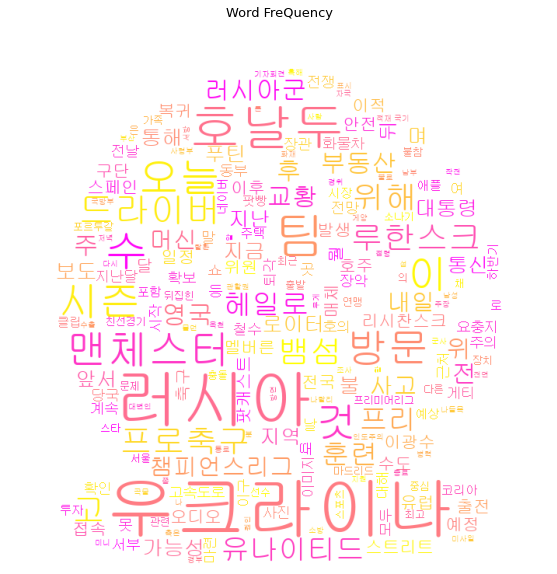

In [140]:
#워드 클라우드 시각화하기
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off") #축 지정 X
plt.title("Word FreQuency",size = 13)
plt.show